<a href="https://colab.research.google.com/github/cfreeman22/D213/blob/main/d213_task2_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
device_list = tf.test.gpu_device_name()

In [3]:
device_list

'/device:GPU:0'

In [4]:
!pip install contractions
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 25.8 MB/s eta 0:00:00


In [8]:
import os
import json
import gzip
import pandas as pd
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions       
from bs4 import BeautifulSoup  
import nlp_prepare as prep
import matplotlib.pyplot as plt                         
import seaborn as sns
import nltk                                             # Import Natural Language Tool-Kit.
from collections import Counter
nltk.download('stopwords')                              # Download Stopwords.
nltk.download('all')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk

In [9]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
file_path = '/content/drive/My Drive/Software.json.gz'


## __DATA PRE PROCESSING__

In [11]:
data = prep.extract_data_and_process(file_path)

Shape of the original dataframe is (459436, 12)
****************************************************
****************************************************
Extracted columns for our analysis : overall, reviewText
checking for nulls , and dropping if necessary....
score      0
review    66
dtype: int64
Renaming overall to score and, reviewText to review
****************************************************
****************************************************
Creating the column sentiment and dividing the score as follows (1,2)=negative,(3)= neutral,(4,5) = positive
****************************************************
****************************************************
Checking that the nulls are dropped
score     0
review    0
dtype: int64


In [12]:
data.head()

,score,review,sentiments
0,4.0,The materials arrived early and were in excell...,positive
1,4.0,I am really enjoying this book with the worksh...,positive
2,1.0,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",negative
3,3.0,This book was missing pages!!! Important pages...,neutral
4,5.0,I have used LearnSmart and can officially say ...,positive


## __DATA VISUALIZATION__
 

### __Distribution of sentiments across all the reviews__

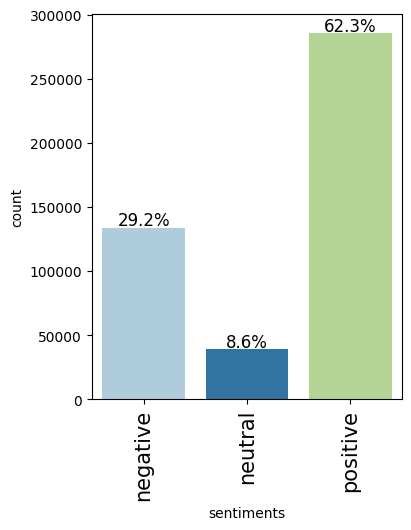

In [13]:
prep.labeled_barplot(data, "sentiments", perc=True)

### __Negative Reviews wordcloud__

In [14]:
from wordcloud import WordCloud,STOPWORDS

In [15]:
sofware_review=data[data['sentiments']=='negative']
words = ' '.join(data['review'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [16]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

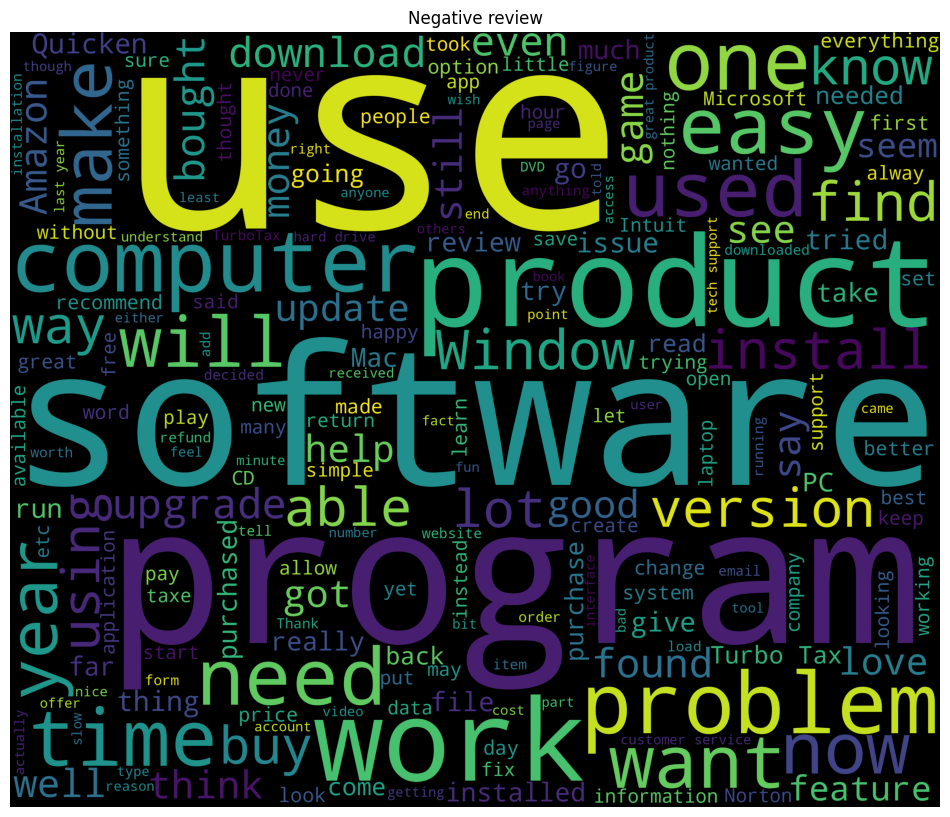

In [17]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Negative review')
plt.show()

### __Positive Reviews wordcloud__

In [18]:
sofware_review=data[data['sentiments']=='positive']
words = ' '.join(data['review'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

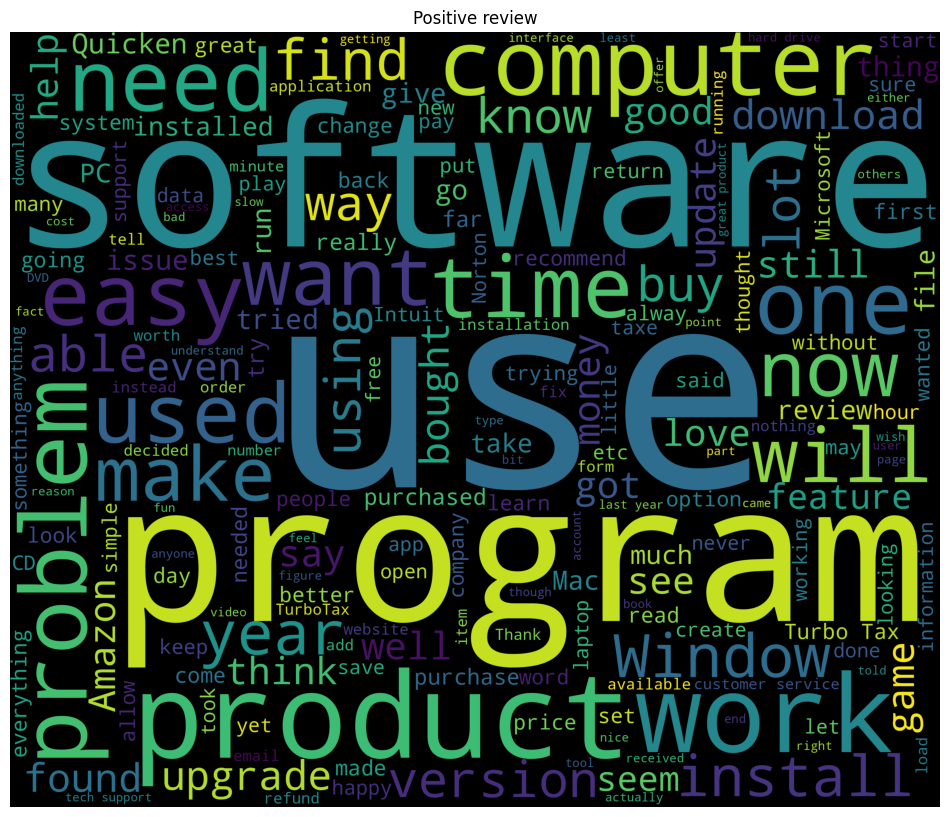

In [20]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Positive review')
plt.show()

### __Neutral Reviews wordcloud__

In [21]:
sofware_review=data[data['sentiments']=='neutral']
words = ' '.join(data['review'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [22]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

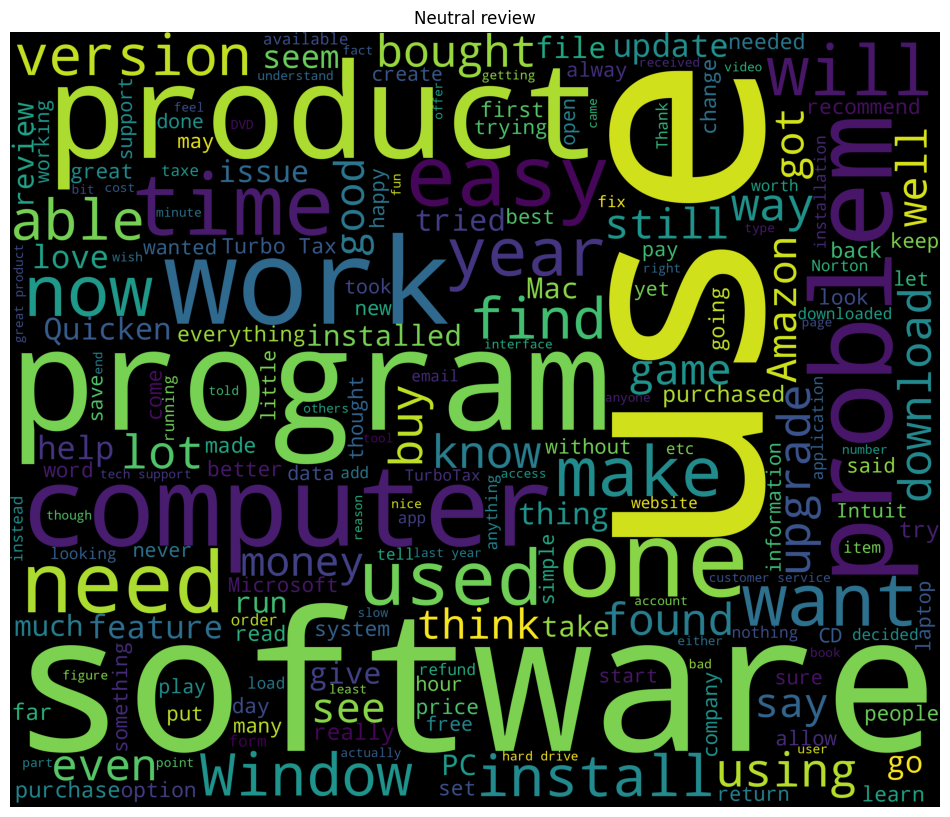

In [23]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Neutral review')
plt.show()

In [24]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,score,review,sentiments
0,4.0,The materials arrived early and were in excellent condition. However for the money spent they really should've come with a binder and not just loose leaf.,positive
1,4.0,"I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me of my human sexuality classwork.",positive
2,1.0,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR MONEY ON THIS SO CALLED BOOK! $140.00 FOR A ""BOOK"" THAT ISIN'T EVEN BOUND LOOSE LEAFS, THAT I HAD TO PROVIDE MY OWN BINDER FOR. TURNS OUT YOU CAN BUY ACCESS TO THE BOOK AT MCGRAW HILL CONNECT CORE FOR $70.00\n\nTHIS BOOK IS A COMPLETE WASTE OF MONEY!",negative
3,3.0,This book was missing pages!!! Important pages. I couldn't answer some test questions because of it!! I have never had this happen before.,neutral
4,5.0,"I have used LearnSmart and can officially say that this is an amazing study tool that quickly and simply adapts to your style of learning. You can access it at anytime and it is on the go! Once you start using LearnSmart you will quickly realize that this is the best way to learn and study.\n\nI am a business student and I did not use LearnSmart for my Accounting I class, however, I did use it for my Accounting II class. The grade difference from Accounting I to Accounting II was a whole letter grade... thanks to LearnSmart!\n\nEvery college student should definitely check it out!",positive


## __Data Processing:__
- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Removal of Special Characters and Punctuations.
- Conversion to lowercase.
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [25]:
#remove the html tags
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, 'html')                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
 

In [26]:
#data cleaning
data['review'] = data['review'].apply(lambda x: clean_text(x)) #[nltk.word_tokenize(line) for line in x ]
data.head()

,score,review,sentiments
0,4.0,The materials arrived early and were in excellent condition. However for the money spent they really should have come with a binder and not just loose leaf.,positive
1,4.0,"I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me of my human sexuality classwork.",positive
2,1.0,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR MONEY ON THIS SO CALLED BOOK! $. FOR A ""BOOK"" THAT ISIN'T EVEN BOUND LOOSE LEAFS, THAT I HAD TO PROVIDE MY OWN BINDER FOR. TURNS OUT YOU CAN BUY ACCESS TO THE BOOK AT MCGRAW HILL CONNECT CORE FOR $.\n\nTHIS BOOK IS A COMPLETE WASTE OF MONEY!",negative
3,3.0,This book was missing pages!!! Important pages. I could not answer some test questions because of it!! I have never had this happen before.,neutral
4,5.0,"I have used LearnSmart and can officially say that this is an amazing study tool that quickly and simply adapts to your style of learning. You can access it at anytime and it is on the go! Once you start using LearnSmart you will quickly realize that this is the best way to learn and study.\n\nI am a business student and I did not use LearnSmart for my Accounting I class, however, I did use it for my Accounting II class. The grade difference from Accounting I to Accounting II was a whole letter grade... thanks to LearnSmart!\n\nEvery college student should definitely check it out!",positive


In [27]:
data['review'] = data.apply(lambda row: nltk.word_tokenize(row['review']), axis=1) # Tokenization of data
data.head()

,score,review,sentiments
0,4.0,"[The, materials, arrived, early, and, were, in, excellent, condition, ., However, for, the, money, spent, they, really, should, have, come, with, a, binder, and, not, just, loose, leaf, .]",positive
1,4.0,"[I, am, really, enjoying, this, book, with, the, worksheets, that, make, you, review, your, goals, ,, what, to, do, when, you, do, not, make, it, ,, it, reminds, me, of, my, human, sexuality, classwork, .]",positive
2,1.0,"[IF, YOU, ARE, TAKING, THIS, CLASS, DON, '', T, WASTE, YOUR, MONEY, ON, THIS, SO, CALLED, BOOK, !, $, ., FOR, A, ``, BOOK, '', THAT, ISI, N'T, EVEN, BOUND, LOOSE, LEAFS, ,, THAT, I, HAD, TO, PROVIDE, MY, OWN, BINDER, FOR, ., TURNS, OUT, YOU, CAN, BUY, ACCESS, TO, THE, BOOK, AT, MCGRAW, HILL, CONNECT, CORE, FOR, $, ., THIS, BOOK, IS, A, COMPLETE, WASTE, OF, MONEY, !]",negative
3,3.0,"[This, book, was, missing, pages, !, !, !, Important, pages, ., I, could, not, answer, some, test, questions, because, of, it, !, !, I, have, never, had, this, happen, before, .]",neutral
4,5.0,"[I, have, used, LearnSmart, and, can, officially, say, that, this, is, an, amazing, study, tool, that, quickly, and, simply, adapts, to, your, style, of, learning, ., You, can, access, it, at, anytime, and, it, is, on, the, go, !, Once, you, start, using, LearnSmart, you, will, quickly, realize, that, this, is, the, best, way, to, learn, and, study, ., I, am, a, business, student, and, I, did, not, use, LearnSmart, for, my, Accounting, I, class, ,, however, ,, I, did, use, it, for, my, Accounting, II, class, ., The, grade, difference, from, Accounting, I, to, Accounting, II, was, a, whole, ...]",positive


In [28]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [29]:
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['review'] = data.apply(lambda row: normalize(row['review']), axis=1)
data.head()

,score,review,sentiments
0,4.0,materials arrive early excellent condition however money spend really come binder not loose leaf,positive
1,4.0,really enjoy book worksheets make review goals not make remind human sexuality classwork,positive
2,1.0,take class waste money call book book isi nt even bind loose leaf provide binder turn buy access book mcgraw hill connect core book complete waste money,negative
3,3.0,book miss page important page could not answer test question never happen,neutral
4,5.0,use learnsmart officially say amaze study tool quickly simply adapt style learn access anytime go start use learnsmart quickly realize best way learn study business student not use learnsmart account class however use account ii class grade difference account account ii whole letter grade thank learnsmart every college student definitely check,positive


### __Categories of sentiment to use__

The focus will be on positive and negative reviews only. The neutral reviews will be dropped

In [30]:
review_data = data.copy()

In [31]:
review_data = data[(data['sentiments']=='negative') | (data['sentiments']== 'positive')]

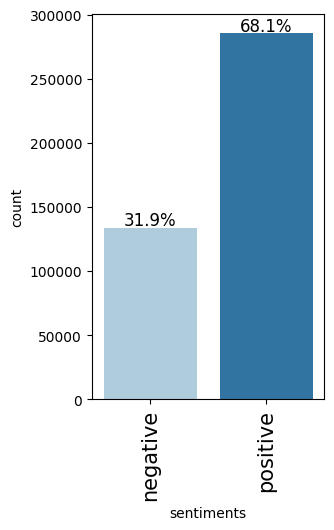

In [32]:
prep.labeled_barplot(review_data, "sentiments", perc=True)

In [33]:
review_data.sentiments = review_data.sentiments.replace(to_replace=['negative', 'positive'], value=[0, 1])



In [34]:
review_data.head()

,score,review,sentiments
0,4.0,materials arrive early excellent condition however money spend really come binder not loose leaf,1
1,4.0,really enjoy book worksheets make review goals not make remind human sexuality classwork,1
2,1.0,take class waste money call book book isi nt even bind loose leaf provide binder turn buy access book mcgraw hill connect core book complete waste money,0
4,5.0,use learnsmart officially say amaze study tool quickly simply adapt style learn access anytime go start use learnsmart quickly realize best way learn study business student not use learnsmart account class however use account ii class grade difference account account ii whole letter grade thank learnsmart every college student definitely check,1
5,4.0,strong backgroung good read quite date take holistic approach subject lack reference bite surprise jorge,1


In [55]:
review_data.iloc[3]

score                                                                                                                                                                                                                                                                                                                                                               5.0
review        use learnsmart officially say amaze study tool quickly simply adapt style learn access anytime go start use learnsmart quickly realize best way learn study business student not use learnsmart account class however use account ii class grade difference account account ii whole letter grade thank learnsmart every college student definitely check
sentiments                                                                                                                                                                                                                                                                              

In [24]:
#clean
#cleaned_data = review_data.to_csv('cleaned_amazon_review_')

In [35]:
# counting unique wword for the vocabulary size

def counter_word(text_col):
  count = Counter()
  for text in text_col.values:
    for word in text.split():
      count[word] += 1
  return count


counter = counter_word(review_data.review)

In [36]:
len(counter)

133937

In [37]:
counter

Counter({'materials': 969,
         'arrive': 4698,
         'early': 3347,
         'excellent': 15012,
         'condition': 1923,
         'however': 21261,
         'money': 39921,
         'spend': 19992,
         'really': 45157,
         'come': 37608,
         'binder': 82,
         'not': 474147,
         'loose': 906,
         'leaf': 67,
         'enjoy': 8693,
         'book': 15845,
         'worksheets': 375,
         'make': 82488,
         'review': 35173,
         'goals': 459,
         'remind': 1181,
         'human': 977,
         'sexuality': 3,
         'classwork': 12,
         'take': 54461,
         'class': 3804,
         'waste': 15855,
         'call': 23965,
         'isi': 6,
         'nt': 1116,
         'even': 56059,
         'bind': 268,
         'provide': 14647,
         'turn': 12067,
         'buy': 85142,
         'access': 13198,
         'mcgraw': 32,
         'hill': 278,
         'connect': 6255,
         'core': 2732,
         'complete': 150

In [38]:
counter.most_common(10)

[('not', 474147),
 ('use', 277103),
 ('work', 164815),
 ('software', 160690),
 ('get', 154140),
 ('program', 150409),
 ('product', 132276),
 ('would', 112027),
 ('time', 105452),
 ('version', 99483)]

In [39]:
vocab_size = len(counter)

In [40]:
review_data.shape[0]

419976

### __SPLIT THE DATA INTO TRAIN AND TEST SETS__

In [41]:
train_size = int(review_data.shape[0] * 70)

train_df = review_data[:train_size]

test_df = review_data[train_size:]

# split text and labels

train_sentences = train_df.review.to_numpy()
train_labels = train_df.sentiments.to_numpy()

test_sentences = test_df.review.to_numpy()
test_labels = test_df.sentiments.to_numpy()

# tokenize


In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [43]:
# Starting the tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
# Fitting the tokenizer
tokenizer.fit_on_texts(train_sentences)
# Getting our word index
word_index = tokenizer.word_index

In [47]:
# Setting sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)


In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [49]:
# Setting padding
# max number of word in a sequence, review will be truncated after the 150th word
max_length = 150 
embedding_dim = 16


train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [51]:
train_padded[10]

array([   1,  170,   59, 2173,  226, 7892, 1450,   39,  114, 1038,    9,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d